# FAERS Public dataset download

## Importing all the necessary libraries

In [1]:
!pip install geopandas
import geopandas as gpd

import pandas as pd
#import vaex as vd
import numpy as np
from shapely.geometry import Point

#For data handling and munging. This is an extremely powerful tool
#for working with data in a spreadsheet-like format. If you’re familiar with R data.frames, then you’ll love pandas.
import fiona
#fiona - For making it easy to read/write geospatial data formats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#for plotting

import os
#sys library

from functools import reduce

     |████████████████████████████████| 1.0MB 5.6MB/s 
     |████████████████████████████████| 6.5MB 20.1MB/s 
     |████████████████████████████████| 15.3MB 282kB/s 


In [2]:
#importing
#requesting files over the internet
#import requests
import urllib.request

#unpacking zipfiles
import zipfile
import tarfile
import urllib.request, shutil


In [3]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/colab_faers_data/Data/zip')

## Importing latest FAERS dataset from FDA.gov


#### brute force download (use 1 only)


In [ ]:
#brute force download
for i in range(2013,2021):
    for j in range (1,5):
        url = "https://fis.fda.gov/content/Exports/faers_ascii_"+str(i)+"q"+str(j)+".zip"#2013 and up
        #url = "https://fis.fda.gov/content/Exports/aers_ascii_"+str(i)+"q"+str(j)+".zip" #earlier database

        #print(i,"_",j)
        print(url)
        file_name = 'FAERS_'+str(i)+'q'+str(j)+'.zip'

        with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
            shutil.copyfileobj(response, out_file)
print('zipfile download complete')

https://fis.fda.gov/content/Exports/faers_ascii_2013q1.zip
https://fis.fda.gov/content/Exports/faers_ascii_2013q2.zip
https://fis.fda.gov/content/Exports/faers_ascii_2013q3.zip
https://fis.fda.gov/content/Exports/faers_ascii_2013q4.zip
https://fis.fda.gov/content/Exports/faers_ascii_2014q1.zip
https://fis.fda.gov/content/Exports/faers_ascii_2014q2.zip
https://fis.fda.gov/content/Exports/faers_ascii_2014q3.zip
https://fis.fda.gov/content/Exports/faers_ascii_2014q4.zip
https://fis.fda.gov/content/Exports/faers_ascii_2015q1.zip
https://fis.fda.gov/content/Exports/faers_ascii_2015q2.zip
https://fis.fda.gov/content/Exports/faers_ascii_2015q3.zip
https://fis.fda.gov/content/Exports/faers_ascii_2015q4.zip
https://fis.fda.gov/content/Exports/faers_ascii_2016q1.zip
https://fis.fda.gov/content/Exports/faers_ascii_2016q2.zip
https://fis.fda.gov/content/Exports/faers_ascii_2016q3.zip
https://fis.fda.gov/content/Exports/faers_ascii_2016q4.zip
https://fis.fda.gov/content/Exports/faers_ascii_2017q1.z

#### piece meal download (use 1 only)

In [15]:
###use one or the other
###what year do you want to download
###data starts from year 2004
i= 2020
###what quarter do you want to download (4 options q1, q2, q3, q4)
j = 1#quarter
url = "https://fis.fda.gov/content/Exports/faers_ascii_"+str(i)+"q"+str(j)+".zip"#2013 and up
#url_ = "https://fis.fda.gov/content/Exports/aers_ascii_"+str(i_)+"q"+str(j_)+".zip" #earlier databaseprint(url_)
file_name = 'FAERS_'+str(i)+'q'+str(j)+'.zip'
#file_name = 'FLOODOUTLOOK_LATEST_simp_wgs84.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
  shutil.copyfileobj(response, out_file)

print('zipfile download complete')

zipfile download complete


## unzip  dataset

#### one folder at a time 

In [ ]:
i_= 2012 #year
###what quarter do you want to download (4 options q1, q2, q3, q4)
j_ =1 #quarter
file_name = 'FAERS_'+str(i_)+'q'+str(j_)+'.zip'
print(file_name)

#zip_path = r"D:/Research/FAERS_Public/Data_20210222/Orignal_data/zipfile_data/"
#unzip_path = r"D:/Research/FAERS_Public/Data_20210222/Orignal_data/unzipped_data"
os.chdir(zip_path)
import zipfile
zip_ref = zipfile.ZipFile(file_name)
#zip_ref.printdir() 
os.chdir(unzip_path)
zip_ref.extractall('FAERS_'+str(i_)+'q'+str(j_))
zip_ref.close()
print('zipfile unzip complete')


FAERS_2012q1.zip
zipfile unzip complete


#### batch unzip folders 

In [16]:
import zipfile

for i_ in range(2013, 2021):
    for j_ in range (1,5):
        zip_path='/content/drive/MyDrive/colab_faers_data/Data/zip'
        unzip_path='/content/drive/MyDrive/colab_faers_data/Data/unzip'

        #zip_path = r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\zipfile_data"
       # unzip_path = r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data"
        os.chdir(zip_path)
        file_name = 'FAERS_'+str(i_)+'q'+str(j_)+'.zip'
        print(file_name)
        zip_ref = zipfile.ZipFile(file_name)
#zip_ref.printdir() 
        os.chdir(unzip_path)
        zip_ref.extractall('FAERS_'+str(i_)+'q'+str(j_))
        zip_ref.close()
        print('zipfile unzip complete')

FAERS_2020q1.zip
zipfile unzip complete
FAERS_2020q2.zip
zipfile unzip complete
FAERS_2020q3.zip
zipfile unzip complete
FAERS_2020q4.zip
zipfile unzip complete


change files names here
2020 upper caps to lower caps ASCII to ascii
2018 q 1 DEMO_new to Demo

In [6]:
#os.chdir('/content/drive/MyDrive/colab_faers_data/Data/zip')
 
os.rename("/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_2018q1/ascii/DEMO18Q1_new.txt",
          "/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_2018q1/ascii/DEMO18Q1.txt")

for i_ in range(2020, 2021):
    for j_ in range (1,5):
        os.rename("/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_"+str(i_)+"q"+str(j_)+"/ASCII",
          "/content/drive/MyDrive/colab_faers_data/Data/unzip/FAERS_"+str(i_)+"q"+str(j_)+"/ascii")
        print(i_,j_)

print("The File has been successfully renamed!")

2020 1
2020 2
2020 3
2020 4
The File has been successfully renamed!


2018

In [3]:
df1_appended_data0 = []
df2_appended_data0 = []
#df3_appended_data1 = []
#df4_appended_data1 = []
df5_appended_data0 = []
#df6_appended_data1 = []
#df7_appended_data1 = []

for i in range(2018,2021):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
       # zip_path = r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"
        #print(zip_path)
       # os.chdir(zip_path)
       #/content/FAERS_2013q2
       #/content/FAERS_2013q1/ascii/DEMO13Q1.txt
        df1_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        #df3_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"INDI"+str(ii)+"Q"+str(j)+".txt"
        df4_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df5_filepath =  r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"REAC"+str(ii)+"Q"+str(j)+".txt"
        #df6_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"RPSR"+str(ii)+"Q"+str(j)+".txt"
        #df7_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"THER"+str(ii)+"Q"+str(j)+".txt"

        df1 = pd.read_csv('/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'DEMO'+str(ii)+'Q'+str(j)+'.txt',delimiter="$",error_bad_lines=False, encoding='utf-8')
        #df1 = pd.read_csv(df1_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8')
        df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False, encoding="cp1252")
        #df3 = pd.read_csv(df3_filepath,delimiter="$")
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8')
       # df6 = pd.read_csv(df6_filepath,delimiter="$")
       # df7 = pd.read_csv(df7_filepath,delimiter="$")
       # print(df2.columns)
        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        
        df5.columns = df5.columns.str.lower()  


        df1_appended_data0.append(df1)
        df2_appended_data0.append(df2)
        #df3_appended_data1.append(df3)
      #  df4_appended_data1.append(df4)
        df5_appended_data0.append(df5)
      #  df6_appended_data1.append(df6)
       # df7_appended_data1.append(df7)

# see pd.concat documentation for more info
df1_appended_data0 = pd.concat(df1_appended_data0, axis=0)
df2_appended_data0 = pd.concat(df2_appended_data0, axis=0)
#df3_appended_data1 = pd.concat(df3_appended_data1, axis=0)
#df4_appended_data1 = pd.concat(df4_appended_data1, axis=0)
df5_appended_data0 = pd.concat(df5_appended_data0, axis=0)
#df6_appended_data1 = pd.concat(df6_appended_data1, axis=0)
#df7_appended_data1 = pd.concat(df7_appended_data1, axis=0)
print('done')

18
1


FileNotFoundError: ignored

2014 to **2017**

In [ ]:
df1_appended_data1 = []
df2_appended_data1 = []
#df3_appended_data1 = []
#df4_appended_data1 = []
df5_appended_data1 = []
#df6_appended_data1 = []
#df7_appended_data1 = []

for i in range(2014,2018):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
       # zip_path = r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"
        #print(zip_path)
       # os.chdir(zip_path)
       #/content/FAERS_2013q2
       #/content/FAERS_2013q1/ascii/DEMO13Q1.txt
        df1_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        #df3_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"INDI"+str(ii)+"Q"+str(j)+".txt"
        df4_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'REAC'+str(ii)+'Q'+str(j)+'.txt'

        #df5_filepath =  r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"REAC"+str(ii)+"Q"+str(j)+".txt"
        #df6_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"RPSR"+str(ii)+"Q"+str(j)+".txt"
        #df7_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"THER"+str(ii)+"Q"+str(j)+".txt"

        df1 = pd.read_csv('/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'DEMO'+str(ii)+'Q'+str(j)+'.txt',delimiter="$",error_bad_lines=False, encoding='utf-8')
        #df1 = pd.read_csv(df1_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8')
        df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False, encoding="cp1252")
        #df3 = pd.read_csv(df3_filepath,delimiter="$")
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,delimiter="$",error_bad_lines=False, encoding='utf-8')
       # df6 = pd.read_csv(df6_filepath,delimiter="$")
       # df7 = pd.read_csv(df7_filepath,delimiter="$")
       # print(df2.columns)
        df1.columns = df1.columns.str.lower()  
        df2.columns = df2.columns.str.lower()  
        
        df5.columns = df5.columns.str.lower()  


        df1_appended_data1.append(df1)
        df2_appended_data1.append(df2)
        #df3_appended_data1.append(df3)
      #  df4_appended_data1.append(df4)
        df5_appended_data1.append(df5)
      #  df6_appended_data1.append(df6)
       # df7_appended_data1.append(df7)

# see pd.concat documentation for more info
df1_appended_data0 = pd.concat(df1_appended_data0, axis=0)
df2_appended_data0 = pd.concat(df2_appended_data0, axis=0)
#df3_appended_data1 = pd.concat(df3_appended_data1, axis=0)
#df4_appended_data1 = pd.concat(df4_appended_data1, axis=0)
df5_appended_data0 = pd.concat(df5_appended_data0, axis=0)
#df6_appended_data1 = pd.concat(df6_appended_data1, axis=0)
#df7_appended_data1 = pd.concat(df7_appended_data1, axis=0)
print('done')

14
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


14
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


14
3


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


14
4


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


15
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


15
2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


15
3


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


15
4


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


16
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


16
2
16
3
16
4
17
1


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### FAERS dataset year 2015, 2016


In [ ]:
import gc
collected = gc.collect()
gc.collect()

print ("Garbage collector: collected %d objects." % (collected))

Garbage collector: collected 22 objects.


### FAERS dataset year 2013, 2014


In [ ]:
df1_appended_data2 = []
#df2_appended_data2 = []
#df3_appended_data2 = []
#df4_appended_data2 = []
df5_appended_data2 = []
#df6_appended_data2 = []
#df7_appended_data2 = []

for i in range(2013,2014):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
        #zip_path = r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"
        #print(zip_path)
        #os.chdir(zip_path)
        df1_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'DEMO'+str(ii)+'Q'+str(j)+'.txt'
        df2_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'DRUG'+str(ii)+'Q'+str(j)+'.txt'
        #df3_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"INDI"+str(ii)+"Q"+str(j)+".txt"
        df4_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'OUTC'+str(ii)+'Q'+str(j)+'.txt'
        df5_filepath =  '/content/FAERS_'+str(i)+'q'+str(j)+'/'+'ascii'+'/'+'REAC'+str(ii)+'Q'+str(j)+'.txt'


         # df1_filepath =  r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"DEMO"+str(ii)+"Q"+str(j)+".txt"
       # df2_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"DRUG"+str(ii)+"Q"+str(j)+".txt"
        #df3_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"INDI"+str(ii)+"Q"+str(j)+".txt"
       # df4_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"OUTC"+str(ii)+"Q"+str(j)+".txt"
        #df5_filepath =  r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"REAC"+str(ii)+"Q"+str(j)+".txt"
        #df6_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"RPSR"+str(ii)+"Q"+str(j)+".txt"
        #df7_filepath =  r"G:\Research\FAERS_Public\Data\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"THER"+str(ii)+"Q"+str(j)+".txt"

        df1 = pd.read_csv(df1_filepath,delimiter="$",error_bad_lines=False)
        #df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False)
        #df3 = pd.read_csv(df3_filepath,delimiter="$")
        #df4 = pd.read_csv(df4_filepath,delimiter="$")
        df5 = pd.read_csv(df5_filepath,delimiter="$",error_bad_lines=False)
       # df6 = pd.read_csv(df6_filepath,delimiter="$")
       # df7 = pd.read_csv(df7_filepath,delimiter="$")
        df1.columns = df1.columns.str.lower()  
        df5.columns = df5.columns.str.lower()  

        df1_appended_data2.append(df1)
       # df2_appended_data2.append(df2)
        #df3_appended_data2.append(df3)
      #  df4_appended_data2.append(df4)
        df5_appended_data2.append(df5)
      #  df6_appended_data2.append(df6)
       # df7_appended_data2.append(df7)

# see pd.concat documentation for more info
df1_appended_data2 = pd.concat(df1_appended_data2, axis=0)
#df2_appended_data2 = pd.concat(df2_appended_data2, axis=0)
#df3_appended_data2 = pd.concat(df3_appended_data2, axis=0)
#df4_appended_data2 = pd.concat(df4_appended_data2, axis=0)
df5_appended_data2 = pd.concat(df5_appended_data2, axis=0)
#df6_appended_data2 = pd.concat(df6_appended_data2, axis=0)
#df7_appended_data2 = pd.concat(df7_appended_data2, axis=0)
print('done')

13
1
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2013q1\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


13
2
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2013q2\ascii
13
3
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2013q3\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


13
4
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2013q4\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,15,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


14
1
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2014q1\ascii
14
2
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2014q2\ascii
14
3
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2014q3\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


14
4
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2014q4\ascii
done


In [ ]:
df2_appended_data2 = []

for i in range(2013,2015):
    for j in range (1,5):
        ii = str(i)
        ii =(ii[-2:])
        print(ii)
        print(j)
        zip_path = r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"
        print(zip_path)
        os.chdir(zip_path)
        df2_filepath =  r"D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_"+str(i)+"q"+str(j)+"\\"+"ascii"+"\\"+"DRUG"+str(ii)+"Q"+str(j)+".txt"

        df2 = pd.read_csv(df2_filepath,delimiter="$",error_bad_lines=False)
        df2.columns = df2.columns.str.lower()  
       # print(df2.columns)
        
        df2_appended_data2.append(df2)

# see pd.concat documentation for more info
df2_appended_data2 = pd.concat(df2_appended_data2, axis=0)

print('done')

13
1
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2013q1\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,10,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


13
2
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2013q2\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


13
3
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2013q3\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


13
4
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2013q4\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


14
1
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2014q1\ascii
14
2
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2014q2\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


14
3
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2014q3\ascii


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


14
4
D:\Research\FAERS_Public\Data_20210222\Orignal_data\unzipped_data\FAERS_2014q4\ascii
done



print(df1_appended_data0.info())
print(df2_appended_data0.info())
print(df5_appended_data0.info())

print(df1_appended_data1.info())
print(df2_appended_data1.info())
print(df5_appended_data1.info())

print(df1_appended_data2.info())
print(df2_appended_data2.info())
print(df5_appended_data2.info())

#df1_appended_data3.head()
#df2_appended_data2.head()
#df2_appended_data1.ROLE_COD
#df1_appended_data0.info()

### primary id float to str

df1_appended_data0['primaryid'] = df1_appended_data0['primaryid'].astype(str).replace('\.0', '', regex=True)
df1_appended_data0['caseid'] = df1_appended_data0['caseid'].astype(str).replace('\.0', '', regex=True)

df1_appended_data1['primaryid'] = df1_appended_data1['primaryid'].astype(str).replace('\.0', '', regex=True)
df1_appended_data1['caseid'] = df1_appended_data1['caseid'].astype(str).replace('\.0', '', regex=True)

df1_appended_data2['primaryid'] = df1_appended_data2['primaryid'].astype(str).replace('\.0', '', regex=True)
df1_appended_data2['caseid'] = df1_appended_data2['caseid'].astype(str).replace('\.0', '', regex=True)

df1_appended_data0['primaryid'] = df1_appended_data0['primaryid'].astype(str)
df1_appended_data0['caseid'] = df1_appended_data0['caseid'].astype(str)

df1_appended_data1['primaryid'] = df1_appended_data1['primaryid'].astype(str)
df1_appended_data1['caseid'] = df1_appended_data1['caseid'].astype(str)

df1_appended_data2['primaryid'] = df1_appended_data2['primaryid'].astype(str)
df1_appended_data2['caseid'] = df1_appended_data2['caseid'].astype(str)

df2_appended_data0['primaryid'] = df2_appended_data0['primaryid'].astype(str).replace('\.0', '', regex=True)
df2_appended_data0['caseid'] = df2_appended_data0['caseid'].astype(str).replace('\.0', '', regex=True)

df2_appended_data1['primaryid'] = df2_appended_data1['primaryid'].astype(str).replace('\.0', '', regex=True)
df2_appended_data1['caseid'] = df2_appended_data1['caseid'].astype(str).replace('\.0', '', regex=True)

df2_appended_data2['primaryid'] = df2_appended_data2['primaryid'].astype(str).replace('\.0', '', regex=True)
df2_appended_data2['caseid'] = df2_appended_data2['caseid'].astype(str).replace('\.0', '', regex=True)

df2_appended_data0['primaryid'] = df2_appended_data0['primaryid'].astype(str)
df2_appended_data0['caseid'] = df2_appended_data0['caseid'].astype(str)

df2_appended_data1['primaryid'] = df2_appended_data1['primaryid'].astype(str)
df2_appended_data1['caseid'] = df2_appended_data1['caseid'].astype(str)

df2_appended_data2['primaryid'] = df2_appended_data2['primaryid'].astype(str)
df2_appended_data2['caseid'] = df2_appended_data2['caseid'].astype(str)

df5_appended_data0['primaryid'] = df5_appended_data0['primaryid'].astype(str).replace('\.0', '', regex=True)
df5_appended_data0['caseid'] = df5_appended_data0['caseid'].astype(str).replace('\.0', '', regex=True)

df5_appended_data1['primaryid'] = df5_appended_data1['primaryid'].astype(str).replace('\.0', '', regex=True)
df5_appended_data1['caseid'] = df5_appended_data1['caseid'].astype(str).replace('\.0', '', regex=True)

df5_appended_data2['primaryid'] = df5_appended_data2['primaryid'].astype(str).replace('\.0', '', regex=True)
df5_appended_data2['caseid'] = df5_appended_data2['caseid'].astype(str).replace('\.0', '', regex=True)

df5_appended_data0['primaryid'] = df5_appended_data0['primaryid'].astype(str)
df5_appended_data0['caseid'] = df5_appended_data0['caseid'].astype(str)

df5_appended_data1['primaryid'] = df5_appended_data1['primaryid'].astype(str)
df5_appended_data1['caseid'] = df5_appended_data1['caseid'].astype(str)

df5_appended_data2['primaryid'] = df5_appended_data2['primaryid'].astype(str)
df5_appended_data2['caseid'] = df5_appended_data2['caseid'].astype(str)

In [55]:
df2_appended_data0['drugname']= df2_appended_data0['drugname'].str.lower()
df2_appended_data1['drugname']= df2_appended_data1['drugname'].str.lower()
df2_appended_data1b['drugname']= df2_appended_data1b['drugname'].str.lower()

df2_appended_data2['drugname']= df2_appended_data2['drugname'].str.lower()



df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.strip()
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.strip(',')
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace(u"/",", ")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace(u"' ","'")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace('\n',"")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace('.',"")
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.replace('\n ',"")
df2_appended_data0['drugname'] = [''.join(c.split()) for c in df2_appended_data0['drugname'].astype(str)]
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data0['drugname'] = df2_appended_data0['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})

df2_appended_data1['drugname'] = df2_appended_data1['drugname'].str.strip()
df2_appended_data1['drugname'] = df2_appended_data1['drugname'].str.strip(',')
df2_appended_data1['drugname'] = df2_appended_data1['drugname'].str.replace(u"/",", ")
df2_appended_data1['drugname'] = df2_appended_data1['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data1['drugname'] = df2_appended_data1['drugname'].str.replace(u"' ","'")
df2_appended_data1['drugname'] = df2_appended_data1['drugname'].str.replace('.',"")
df2_appended_data1['drugname'] = df2_appended_data1['drugname'].str.replace(' \n',"")
df2_appended_data1['drugname'] = df2_appended_data1['drugname'].str.replace('\n ',"")
df2_appended_data1['drugname'] = [''.join(c.split()) for c in df2_appended_data1['drugname'].astype(str)]
df2_appended_data1['drugname'] = df2_appended_data1['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data1['drugname'] = df2_appended_data1['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})


df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.strip()
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.strip(',')
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace(u"/",", ")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace(u"' ","'")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace('.',"")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace(' \n',"")
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.replace('\n ',"")
df2_appended_data1b['drugname'] = [''.join(c.split()) for c in df2_appended_data1b['drugname'].astype(str)]
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data1b['drugname'] = df2_appended_data1b['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})



df2_appended_data2['drugname'] = df2_appended_data2['drugname'].str.strip()
df2_appended_data2['drugname'] = df2_appended_data2['drugname'].str.strip(',')
df2_appended_data2['drugname'] = df2_appended_data2['drugname'].str.replace(u"/",", ")
df2_appended_data2['drugname'] = df2_appended_data2['drugname'].str.replace(u"\\\\", ", ")
df2_appended_data2['drugname'] = df2_appended_data2['drugname'].str.replace(u"' ","'")
df2_appended_data2['drugname'] = df2_appended_data2['drugname'].str.replace('.',"")
df2_appended_data2['drugname'] = df2_appended_data2['drugname'].str.replace(' \n',"")
df2_appended_data2['drugname'] = df2_appended_data2['drugname'].str.replace('\n ',"")
df2_appended_data2['drugname'] = [''.join(c.split()) for c in df2_appended_data2['drugname'].astype(str)]
df2_appended_data2['drugname'] = df2_appended_data2['drugname'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
df2_appended_data2['drugname'] = df2_appended_data2['drugname'].str.translate({None: ",!.; ''-@!%^&*)("})

NameError: ignored

In [ ]:
#df2_appended_data2['drugname'].value_counts()
#df1_appended_data0.head()

In [ ]:
os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

world_shp = gpd.read_file(filename='world.shp')
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
europe = ['AL', 'AD', 'AM', 'AT', 'BY', 'BE', 'BA', 'BG', 'CH', 'CY', 'CZ', 'DE',
        'DK', 'EE', 'ES', 'FO', 'FI', 'FR', 'GB', 'GE', 'GI', 'GR', 'HU', 'HR',
        'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MC', 'MK', 'MT', 'NO', 'NL', 'PL',
        'PT', 'RO', 'SE', 'SI', 'SK', 'SM', 'TR', 'UA', 'VA']
world_shp = world_shp[world_shp['ISO_2DIGIT'].str.contains('|'.join(europe),case=False, na=False, regex=True)]
world_shp['centroid'] = world_shp['geometry'].centroid
world_shp['coords'] = world_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
world_shp['coords'] = [coords[0] for coords in world_shp['coords']]
world_shp['coords']

world_shp['Lon'] = world_shp.centroid.x
world_shp['Lat'] = world_shp.centroid.y

world_shp = world_shp.reset_index()
world_shp.columns
world_shp.info()

In [ ]:
df1_appended_data0['occr_country'] = df1_appended_data0['occr_country'].str.strip()
df1_appended_data0['occr_country'] = df1_appended_data0['occr_country'].str.lower()

df_e0 =df1_appended_data0.merge(world_shp, left_on='occr_country', right_on='ISO_2DIGIT', how='inner')

In [ ]:
df1_appended_data1['occr_country'] = df1_appended_data1['occr_country'].str.strip()
df1_appended_data1['occr_country'] = df1_appended_data1['occr_country'].str.lower()

df_e1 =df1_appended_data1.merge(world_shp, left_on='occr_country', right_on='ISO_2DIGIT', how='inner')

In [ ]:
df1_appended_data2['occr_country'] = df1_appended_data2['occr_country'].str.strip()
df1_appended_data2['occr_country'] = df1_appended_data2['occr_country'].str.lower()

df_e2 =df1_appended_data2.merge(world_shp, left_on='occr_country', right_on='ISO_2DIGIT', how='inner')

In [ ]:


###df_h0 = df2_appended_data0[df2_appended_data0['drugname'].isin(['xarelto'])]
###df_h1 = df2_appended_data1[df2_appended_data1['drugname'].isin(['xarelto'])]
###df_h2 = df2_appended_data2[df2_appended_data2['drugname'].isin(['xarelto'])]

#df_h0 = df_h0[['primaryid','caseid','drugname','prod_ai','lot_num', 'nda_num']]
#df_h1 = df_h1[['primaryid','caseid','drugname','prod_ai','lot_num', 'nda_num']]
#df_h2 = df_h2[['primaryid','caseid','drugname','prod_ai','lot_num', 'nda_num']]

#df_e0.head()

#df_e1.info()



In [ ]:
import gc
collected = gc.collect()
gc.collect()

print ("Garbage collector: collected %d objects." % (collected))

Garbage collector: collected 100 objects.


In [ ]:
#df_h0.drugname.value_counts()
#94763+247264+53095

In [ ]:
data_frames0 = [df_e0, df2_appended_data0,df5_appended_data0]
df_merged0 = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid'],
                                            how='inner'), data_frames0)

df_merged0.head()
#dd = df_merged0[['caseid_x', 'caseid_y','caseid']]
#duplicateRowsDF1 = dd.drop_duplicates(subset=['caseid_x', 'caseid_y','caseid'], keep='last')
#duplicateRowsDF = duplicateRowsDF1.drop_duplicates(subset=['caseid_x', 'caseid_y','caseid'], keep=False)
#duplicateRowsDF
#duplicateRowsDF1 = duplicateRowsDF1.T.drop_duplicates().T
#duplicateRowsDF1

,primaryid,caseid_x,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,caseid,pt,drug_rec_act
0,100100246,10010024,6,F,200805.0,20180312.0,20140313,20180319,EXP,NaN,...,UNKNOWN,NaN,125057.0,40,MG,NaN,QOW,10010024,Blood pressure increased,NaN
1,100100246,10010024,6,F,200805.0,20180312.0,20140313,20180319,EXP,NaN,...,UNKNOWN,NaN,125057.0,40,MG,NaN,QOW,10010024,Hyperkeratosis,NaN
2,100100246,10010024,6,F,200805.0,20180312.0,20140313,20180319,EXP,NaN,...,UNKNOWN,NaN,125057.0,40,MG,NaN,QOW,10010024,Keratoacanthoma,NaN
3,100100246,10010024,6,F,200805.0,20180312.0,20140313,20180319,EXP,NaN,...,UNKNOWN,NaN,125057.0,40,MG,NaN,QOW,10010024,Malignant melanoma stage I,NaN
4,100100246,10010024,6,F,200805.0,20180312.0,20140313,20180319,EXP,NaN,...,UNKNOWN,NaN,125057.0,40,MG,NaN,QOW,10010024,Therapy non-responder,NaN


In [ ]:
import gc
collected = gc.collect()
gc.collect()

print ("Garbage collector: collected %d objects." % (collected))

Garbage collector: collected 22 objects.


In [ ]:
data_frames1 = [df_e1, df2_appended_data1,df5_appended_data1]


df_merged1 = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid'],
                                            how='inner'), data_frames1)

df_merged1.head()

,primaryid,caseid_x,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,caseid,pt,drug_rec_act
0,100041203,10004120,3,F,20140117.0,20150316.0,20140312,20150317,EXP,NaN,...,NaN,NaN,22068,800,MG,CAPSULE,BID,10004120,Acute myocardial infarction,NaN
1,100041203,10004120,3,F,20140117.0,20150316.0,20140312,20150317,EXP,NaN,...,NaN,NaN,NaN,75,MG,NaN,QD,10004120,Acute myocardial infarction,NaN
2,100041203,10004120,3,F,20140117.0,20150316.0,20140312,20150317,EXP,NaN,...,NaN,NaN,NaN,75,MG,NaN,QD,10004120,Acute myocardial infarction,NaN
3,100041203,10004120,3,F,20140117.0,20150316.0,20140312,20150317,EXP,NaN,...,NaN,NaN,NaN,10,MG,NaN,QD,10004120,Acute myocardial infarction,NaN
4,100041203,10004120,3,F,20140117.0,20150316.0,20140312,20150317,EXP,NaN,...,NaN,NaN,NaN,5,MG,NaN,QD,10004120,Acute myocardial infarction,NaN


data_frames1b = [df_e1b, df2_appended_data1b,df5_appended_data1b]


df_merged1b = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid'],
                                            how='inner'), data_frames1b)

df_merged1b.head()

In [ ]:
data_frames2 = [df_e2, df2_appended_data2,df5_appended_data2]
df_merged2 = reduce(lambda  left,right: pd.merge(left,right,on=['primaryid'],
                                            how='inner'), data_frames2)

df_merged2.head()

,primaryid,caseid_x,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,mfr_num,...,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq,prod_ai,caseid,pt,drug_rec_act
0,37108102,3710810,2,F,20010810.0,20130228.0,20010917,20130311,EXP,PHBS2001GR08987,...,NaN,20261,40,MG,CAPSULE,NaN,NaN,3710810,Arthralgia,NaN
1,37108102,3710810,2,F,20010810.0,20130228.0,20010917,20130311,EXP,PHBS2001GR08987,...,NaN,20261,40,MG,CAPSULE,NaN,NaN,3710810,Disturbance in attention,NaN
2,37108102,3710810,2,F,20010810.0,20130228.0,20010917,20130311,EXP,PHBS2001GR08987,...,NaN,20261,40,MG,CAPSULE,NaN,NaN,3710810,Dizziness,NaN
3,37108102,3710810,2,F,20010810.0,20130228.0,20010917,20130311,EXP,PHBS2001GR08987,...,NaN,20261,40,MG,CAPSULE,NaN,NaN,3710810,Hepatic function abnormal,NaN
4,37108102,3710810,2,F,20010810.0,20130228.0,20010917,20130311,EXP,PHBS2001GR08987,...,NaN,20261,40,MG,CAPSULE,NaN,NaN,3710810,Muscle spasms,NaN


In [ ]:
import gc
collected = gc.collect()
gc.collect()

print ("Garbage collector: collected %d objects." % (collected))

Garbage collector: collected 44 objects.


In [ ]:
df_merged0.filter(['primaryid','caseid','lot_num', 'nda_num','pt','drugname','prod_ai','reporter_country','occr_country','event_dt'])

df_merged0.groupby(['reporter_country']).ngroups


117

In [ ]:
import gc
collected = gc.collect()
gc.collect()

print ("Garbage collector: collected %d objects." % (collected))

Garbage collector: collected 44 objects.


In [ ]:
df_merged1.filter(['primaryid','caseid','lot_num', 'nda_num','pt','drugname','prod_ai','reporter_country','occr_country','event_dt'])

df_merged1.groupby(['reporter_country']).ngroups


93

In [ ]:
import gc
collected = gc.collect()
gc.collect()

print ("Garbage collector: collected %d objects." % (collected))

Garbage collector: collected 44 objects.


In [ ]:
df_merged2.filter(['primaryid','caseid','lot_num', 'nda_num','pt','drugname','prod_ai','reporter_country','occr_country','event_dt'])

df_merged2.groupby(['reporter_country']).ngroups

84

In [ ]:
df_merged0['event_dt'] = df_merged0['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged0['event_dt'] = df_merged0['event_dt'].astype(str)
df_merged0['fda_dt'] = df_merged0['fda_dt'].astype(str).replace('\.0', '', regex=True)
df_merged0['fda_dt'] = df_merged0['fda_dt'].astype(str)
df_merged0.fillna(0)
df_merged0.replace(np.nan, 0, inplace=True)

df_merged0['event_dt'] = pd.to_datetime(df_merged0.event_dt, errors='coerce')
df_merged0['event_dt1'] = df_merged0['event_dt'].dt.strftime('%Y%m%d')
df_merged0['fda_dt'] = pd.to_datetime(df_merged0.fda_dt, errors='coerce')
df_merged0['fda_dt1'] = df_merged0['fda_dt'].dt.strftime('%Y%m%d')

df_merged0.head()

,primaryid,caseid_x,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,nda_num,dose_amt,dose_unit,dose_form,dose_freq,caseid,pt,drug_rec_act,event_dt1,fda_dt1
0,100100246,10010024,6,F,2005-08-20,20180312.0,20140313,2018-03-19,EXP,0,...,125057.0,40,MG,0,QOW,10010024,Blood pressure increased,0,20050820,20180319
1,100100246,10010024,6,F,2005-08-20,20180312.0,20140313,2018-03-19,EXP,0,...,125057.0,40,MG,0,QOW,10010024,Hyperkeratosis,0,20050820,20180319
2,100100246,10010024,6,F,2005-08-20,20180312.0,20140313,2018-03-19,EXP,0,...,125057.0,40,MG,0,QOW,10010024,Keratoacanthoma,0,20050820,20180319
3,100100246,10010024,6,F,2005-08-20,20180312.0,20140313,2018-03-19,EXP,0,...,125057.0,40,MG,0,QOW,10010024,Malignant melanoma stage I,0,20050820,20180319
4,100100246,10010024,6,F,2005-08-20,20180312.0,20140313,2018-03-19,EXP,0,...,125057.0,40,MG,0,QOW,10010024,Therapy non-responder,0,20050820,20180319


In [ ]:
df_merged1['event_dt'] = df_merged1['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged1['event_dt'] = df_merged1['event_dt'].astype(str)
df_merged1['fda_dt'] = df_merged1['fda_dt'].astype(str).replace('\.0', '', regex=True)
df_merged1['fda_dt'] = df_merged1['fda_dt'].astype(str)
df_merged1.fillna(0)
df_merged1.replace(np.nan, 0, inplace=True)

df_merged1['event_dt'] = pd.to_datetime(df_merged1.event_dt, errors='coerce')
df_merged1['event_dt1'] = df_merged1['event_dt'].dt.strftime('%Y%m%d')
df_merged1['fda_dt'] = pd.to_datetime(df_merged1.fda_dt, errors='coerce')
df_merged1['fda_dt1'] = df_merged1['fda_dt'].dt.strftime('%Y%m%d')

df_merged1.head()

,primaryid,caseid_x,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,nda_num,dose_amt,dose_unit,dose_form,dose_freq,caseid,pt,drug_rec_act,event_dt1,fda_dt1
0,100041203,10004120,3,F,2014-01-17,20150316.0,20140312,2015-03-17,EXP,0,...,22068,800,MG,CAPSULE,BID,10004120,Acute myocardial infarction,0,20140117,20150317
1,100041203,10004120,3,F,2014-01-17,20150316.0,20140312,2015-03-17,EXP,0,...,0,75,MG,0,QD,10004120,Acute myocardial infarction,0,20140117,20150317
2,100041203,10004120,3,F,2014-01-17,20150316.0,20140312,2015-03-17,EXP,0,...,0,75,MG,0,QD,10004120,Acute myocardial infarction,0,20140117,20150317
3,100041203,10004120,3,F,2014-01-17,20150316.0,20140312,2015-03-17,EXP,0,...,0,10,MG,0,QD,10004120,Acute myocardial infarction,0,20140117,20150317
4,100041203,10004120,3,F,2014-01-17,20150316.0,20140312,2015-03-17,EXP,0,...,0,5,MG,0,QD,10004120,Acute myocardial infarction,0,20140117,20150317


In [ ]:
df_merged2['event_dt'] = df_merged2['event_dt'].astype(str).replace('\.0', '', regex=True)
df_merged2['event_dt'] = df_merged2['event_dt'].astype(str)
df_merged2['fda_dt'] = df_merged2['fda_dt'].astype(str).replace('\.0', '', regex=True)
df_merged2['fda_dt'] = df_merged2['fda_dt'].astype(str)

df_merged2.fillna(0)
df_merged2.replace(np.nan, 0, inplace=True)

df_merged2['event_dt'] = pd.to_datetime(df_merged2.event_dt, errors='coerce')
df_merged2['event_dt1'] = df_merged2['event_dt'].dt.strftime('%Y%m%d')
df_merged2['fda_dt'] = pd.to_datetime(df_merged2.fda_dt, errors='coerce')
df_merged2['fda_dt1'] = df_merged2['fda_dt'].dt.strftime('%Y%m%d')
df_merged2.head()

,primaryid,caseid_x,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,mfr_num,...,dose_amt,dose_unit,dose_form,dose_freq,prod_ai,caseid,pt,drug_rec_act,event_dt1,fda_dt1
0,37108102,3710810,2,F,2001-08-10,20130228.0,20010917,2013-03-11,EXP,PHBS2001GR08987,...,40,MG,CAPSULE,0,0,3710810,Arthralgia,0,20010810,20130311
1,37108102,3710810,2,F,2001-08-10,20130228.0,20010917,2013-03-11,EXP,PHBS2001GR08987,...,40,MG,CAPSULE,0,0,3710810,Disturbance in attention,0,20010810,20130311
2,37108102,3710810,2,F,2001-08-10,20130228.0,20010917,2013-03-11,EXP,PHBS2001GR08987,...,40,MG,CAPSULE,0,0,3710810,Dizziness,0,20010810,20130311
3,37108102,3710810,2,F,2001-08-10,20130228.0,20010917,2013-03-11,EXP,PHBS2001GR08987,...,40,MG,CAPSULE,0,0,3710810,Hepatic function abnormal,0,20010810,20130311
4,37108102,3710810,2,F,2001-08-10,20130228.0,20010917,2013-03-11,EXP,PHBS2001GR08987,...,40,MG,CAPSULE,0,0,3710810,Muscle spasms,0,20010810,20130311


os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

world_shp = gpd.read_file(filename='world.shp')
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
europe = ['AL', 'AD', 'AM', 'AT', 'BY', 'BE', 'BA', 'BG', 'CH', 'CY', 'CZ', 'DE',
        'DK', 'EE', 'ES', 'FO', 'FI', 'FR', 'GB', 'GE', 'GI', 'GR', 'HU', 'HR',
        'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MC', 'MK', 'MT', 'NO', 'NL', 'PL',
        'PT', 'RO', 'SE', 'SI', 'SK', 'SM', 'TR', 'UA', 'VA']
world_shp = world_shp[world_shp['ISO_2DIGIT'].str.contains('|'.join(europe),case=False, na=False, regex=True)]
world_shp['centroid'] = world_shp['geometry'].centroid
world_shp['coords'] = world_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
world_shp['coords'] = [coords[0] for coords in world_shp['coords']]
world_shp['coords']

world_shp['Lon'] = world_shp.centroid.x
world_shp['Lat'] = world_shp.centroid.y

world_shp = world_shp.reset_index()
world_shp.columns

In [ ]:
df_merged0['occr_country'] = df_merged0['occr_country'].str.strip()
df_merged0['occr_country'] = df_merged0['occr_country'].str.lower()

#df_0 =df_merged0.merge(world_shp, left_on='occr_country', right_on='ISO_2DIGIT', how='inner')

In [ ]:
df_merged1['occr_country'] = df_merged1['occr_country'].str.strip()
df_merged1['occr_country'] = df_merged1['occr_country'].str.lower()

#df_1 =df_merged1.merge(world_shp, left_on='occr_country', right_on='ISO_2DIGIT', how='inner')

In [ ]:
df_merged2['occr_country'] = df_merged2['occr_country'].str.strip()
df_merged2['occr_country'] = df_merged2['occr_country'].str.lower()

#df_2 =df_merged2.merge(world_shp, left_on='occr_country', right_on='ISO_2DIGIT', how='inner')

In [ ]:
df_merged0_=df_merged0
df_merged1_=df_merged1
df_merged2_=df_merged2


In [ ]:

df_merged0=df_merged0_
df_merged1=df_merged1_
df_merged2=df_merged2_

frames = [df_merged0,df_merged1,df_merged2]

df_joined_drug = pd.concat(frames)

In [ ]:
df_joined_drug=df_joined_drug['drugname'].groupby([df_joined_drug.primaryid,df_joined_drug.caseid,df_joined_drug.lot_num,df_joined_drug.nda_num, df_joined_drug.event_dt, 
                                                           df_joined_drug.occr_country, df_joined_drug.pt,
                        df_joined_drug.reporter_country,df_joined_drug.CNTRY_NAME,df_joined_drug.fda_dt]).apply(list).reset_index()


In [ ]:
#len(df_1.pt.iloc[5])
#df_1.pt.iloc[5]

df_joined_drug["count_drugs"] = np.nan
lenghts = []
for index, row in df_joined_drug.iterrows():
        #print(row[["geometry","GaugeLID"]])

    length = len(df_joined_drug.drugname.iloc[index])
    lenghts.append(length)
df_joined_drug['count_drugs'] = lenghts   

In [ ]:
df_joined_drug_=df_joined_drug[df_joined_drug['count_drugs']==1]
df_joined_drug_['drugname'] = df_joined_drug_['drugname'].astype(str)

df_joined_drug_['drugname'] = df_joined_drug_['drugname'].str.lstrip('[')
df_joined_drug_['drugname'] = df_joined_drug_['drugname'].str.rstrip(']')
df_joined_drug_['drugname'] = df_joined_drug_['drugname'].str.lstrip("'")
df_joined_drug_['drugname'] = df_joined_drug_['drugname'].str.rstrip("'")

df_joined_drug_.info()
#df_joined_drug_.drugname.value_counts()



<ipython-input-45-04d19630e250>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joined_drug_['drugname'] = df_joined_drug_['drugname'].astype(str)
<ipython-input-45-04d19630e250>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joined_drug_['drugname'] = df_joined_drug_['drugname'].str.lstrip('[')
<ipython-input-45-04d19630e250>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984262 entries, 1 to 5592279
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   primaryid         int64         
 1   caseid            int64         
 2   lot_num           object        
 3   nda_num           object        
 4   event_dt          datetime64[ns]
 5   occr_country      object        
 6   pt                object        
 7   reporter_country  object        
 8   CNTRY_NAME        object        
 9   fda_dt            datetime64[ns]
 10  drugname          object        
 11  count_drugs       int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 296.0+ MB


<ipython-input-45-04d19630e250>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_joined_drug_['drugname'] = df_joined_drug_['drugname'].str.rstrip("'")


In [ ]:
df_joined_drug_.drugname.value_counts().head(20)


humira           40051
nivolumab        32662
novothyrox       28448
methotrexate     27463
sertraline       24394
xarelto          24191
metformin        23288
gilenya          22143
ibuprofen        21445
ciprofloxacin    20688
carboplatin      19872
amlodipine       19477
quetiapine       19473
soliris          19456
enbrel           19260
oxaliplatin      19250
ramipril         18934
paracetamol      18686
duodopa          17645
omeprazole       16613
Name: drugname, dtype: int64

In [ ]:
stop


NameError: name 'stop' is not defined

In [ ]:
df_= df_joined_drug_[df_joined_drug_['drugname'].isin(['nivolumab'])]
#df_joined_drug_.head()

In [ ]:
#df_joined_drug.drugname.value_counts()
df_ = df_.filter(['primaryid','caseid','lot_num', 'nda_num','pt','drugname','prod_ai','reporter_country','occr_country','event_dt','CNTRY_NAME','fda_dt', 'geometry'])

df_.CNTRY_NAME.value_counts().head(20)
#df_.prod_ai

France            11692
Germany           11630
Italy              2349
United Kingdom     1679
Belgium            1104
Spain               914
Ireland             796
Netherlands         554
Czech Republic      322
Poland              313
Switzerland         305
Turkey              173
Sweden              170
Denmark             136
Austria             128
Norway              110
Greece               85
Romania              55
Portugal             46
Finland              36
Name: CNTRY_NAME, dtype: int64

In [ ]:
total_rows = df_['primaryid'].count()
#print(total_rows2+1)
print('total rows: ', total_rows+1)

total rows:  32663


In [ ]:
total_rows = df_['primaryid'].count()
print('total rows: ',total_rows+1)

total rows:  32663


<AxesSubplot:xlabel='event_dt'>

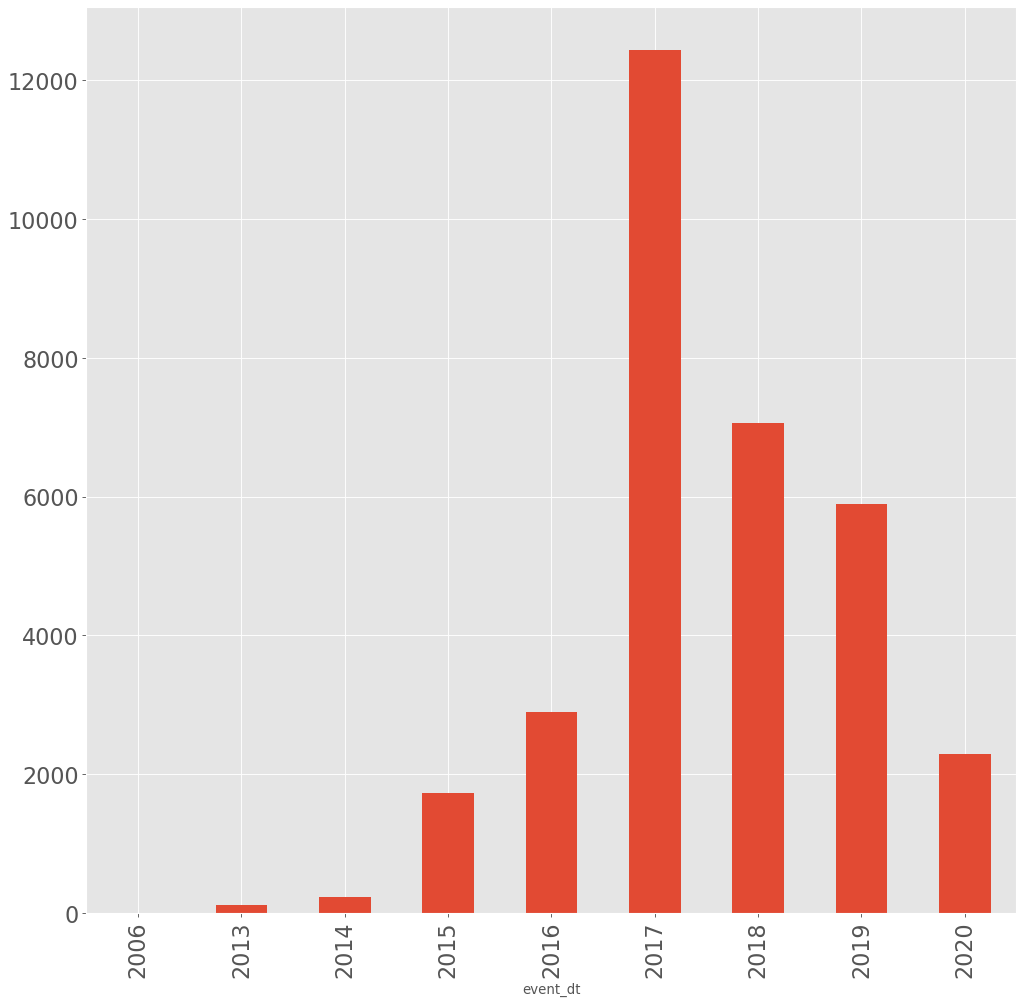

In [ ]:
plt.style.use(['dark_background'])
plt.style.use('ggplot')
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
df_['event_dt'].groupby(df_["event_dt"].dt.year).count().plot(kind="bar")


In [ ]:
#df_natalizumab.drop(['fda_dt'], axis=1,inplace=True)
df_['one'] = int(1)
df_['year'] = pd.DatetimeIndex(df_['event_dt']).year
df_['quarter'] = pd.DatetimeIndex(df_['event_dt']).quarter

df_.head(10)

,primaryid,caseid,lot_num,nda_num,pt,drugname,reporter_country,occr_country,event_dt,CNTRY_NAME,fda_dt,one,year,quarter
661268,100510294,10051029,0,125554,Pulmonary embolism,nivolumab,DE,de,2014-03-27,Germany,2015-01-30,1,2014,1
743560,102227795,10222779,0,125554,Cardiomyopathy,nivolumab,DE,de,2014-05-19,Germany,2016-12-08,1,2014,2
940976,105724023,10572402,0,0,Pyrexia,nivolumab,US,be,2014-10-28,Belgium,2015-03-30,1,2014,4
940978,105724024,10572402,0,0,Pyrexia,nivolumab,BE,be,2014-10-28,Belgium,2016-02-22,1,2014,4
940980,105724025,10572402,0,0,Pyrexia,nivolumab,BE,be,2014-10-28,Belgium,2018-01-08,1,2014,4
1016704,106940941,10694094,0,125554,Pharyngeal oedema,nivolumab,IT,it,2014-12-22,Italy,2015-01-06,1,2014,4
1019989,107027075,10702707,0,125554,Adrenal insufficiency,nivolumab,IE,ie,2013-12-02,Ireland,2015-07-29,1,2013,4
1019990,107027075,10702707,0,125554,Hypophysitis,nivolumab,IE,ie,2013-12-02,Ireland,2015-07-29,1,2013,4
1019991,107027075,10702707,0,125554,Sudden death,nivolumab,IE,ie,2013-12-02,Ireland,2015-07-29,1,2013,4
1021500,107049203,10704920,0,125554,Autoimmune hepatitis,nivolumab,GB,gb,2013-12-31,United Kingdom,2015-04-03,1,2013,4


In [ ]:
os.chdir(r"D:\Research\FAERS_Public_LDA\Data\Analysis_Ready_data\Extracted_data")
#df_.to_csv('df_enbrel_europe.csv')
#df_.to_csv('df_remicade_europe.csv')
#df_.to_csv('df_humira_europe.csv')
#df_.to_csv('df_dexamethasone_europe.csv')
df_.to_csv('df_nivolumab_europe.csv')
#xarelto


In [ ]:
df_.primaryid.dtype

df_=df_[df_.occr_country.str.contains('de|se|si',na=False, case=False)]
df_= df_[df_.pt.str.contains('Fall',na=False, regex=True, case=False)]


In [ ]:
df_.head()
df_1=df_['pt'].groupby([df_.primaryid,df_.caseid,df_.lot_num,df_.nda_num, df_.event_dt, df_.occr_country, df_.drugname,
                        df_.reporter_country,df_.CNTRY_NAME,df_.fda_dt,
                        df_.one,df_.year,df_.quarter]).apply(list).reset_index()



df_1["count_pt"] = np.nan
lenghts = []
for index, row in df_1.iterrows():
        #print(row[["geometry","GaugeLID"]])

    length = len(df_1.pt.iloc[index])
    lenghts.append(length)
df_1['count_pt'] = lenghts   

df_1.head()

,primaryid,caseid,lot_num,nda_num,event_dt,occr_country,drugname,reporter_country,CNTRY_NAME,fda_dt,one,year,quarter,pt,count_pt
0,100510294,10051029,0,125554,2014-03-27,de,nivolumab,DE,Germany,2015-01-30,1,2014,1,[Pulmonary embolism],1
1,102227795,10222779,0,125554,2014-05-19,de,nivolumab,DE,Germany,2016-12-08,1,2014,2,[Cardiomyopathy],1
2,105724023,10572402,0,0,2014-10-28,be,nivolumab,US,Belgium,2015-03-30,1,2014,4,[Pyrexia],1
3,105724024,10572402,0,0,2014-10-28,be,nivolumab,BE,Belgium,2016-02-22,1,2014,4,[Pyrexia],1
4,105724025,10572402,0,0,2014-10-28,be,nivolumab,BE,Belgium,2018-01-08,1,2014,4,[Pyrexia],1


In [ ]:
df_.head()
df_.pt = df_.pt.astype(str)
df_['pt'] = df_['pt'].str.strip()
df_['pt'] = df_['pt'].str.strip(',')
df_['pt']=df_['pt'].str.lower()

df_1=df_['occr_country'].groupby([df_.pt,df_.drugname,df_.event_dt,df_.year,df_.quarter]).apply(list).reset_index()


df_1["count_occr_country"] = np.nan
lenghts = []
for index, row in df_1.iterrows():
        #print(row[["geometry","GaugeLID"]])

    length = len(df_1.occr_country.iloc[index])
    lenghts.append(length)
df_1['count_occr_country'] = lenghts  
#df_1['occr_country'] = df_1['occr_country'].str.split(',').apply(set).str.join(',')


df_1.head()


In [ ]:
df_1[df_1['count_occr_country']>=2]


In [ ]:
#df_1[df_1.pt=='fall']

df_1.primaryid = df_1.primaryid.astype(str)
pid= '100041803'
df_1_=df_1[df_1.primaryid.str.contains(pid)]
df_1_.pt.iloc[0]

In [ ]:
#os.chdir(r"G:\Research\FAERS_Public\Data\Analysis_Ready_data\Extracted_data")
#df_1.to_csv('df_duodopa_europe_PT_joined.csv')
df_1.to_csv('df_nivolumab_europe_PT_joined.csv')
#df_1.to_csv('df_dexamethasone_europe_PT_joined.csv')
#df_1.to_csv('df_omeprazole_europe_PT_joined.csv')
#df_1.to_csv('df_remicade_europe_occr_country_joined.csv')
#df_1.to_csv('df_methotrexate_europe_PT_joined.csv')
#df_1.to_csv('df_remicade_europe_PT_joined.csv')



In [ ]:
df_1[df_1.occr_country=='dk']